# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [ ]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-02 20:37:00--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0.002s  

2025-04-02 20:37:01 (6.72 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
# Mostrar las primeras filas
df = pd.read_csv('Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

User ID

Identificador único del usuario.

Relevancia: No aporta información predictiva, pero puede usarse para seguimiento individual. Generalmente se excluye en modelos de ML.

Gender (Género)

Variable categórica (Male/Female) que indica el género del usuario.

Relevancia: Puede ser útil si existen diferencias en el comportamiento de compra por género. Sin embargo, en muchos casos, el género no es un predictor fuerte y podría eliminarse para evitar sesgos.

Age (Edad)

Variable numérica que representa la edad del usuario.

Relevancia: Muy relevante, ya que la edad suele correlacionarse con el comportamiento de compra (ejemplo: usuarios jóvenes vs. mayores pueden responder distinto a anuncios).

EstimatedSalary (Salario Estimado)

Variable numérica que indica el ingreso estimado del usuario.

Relevancia: Importante, ya que el poder adquisitivo influye en la decisión de compra. Puede ser un predictor clave junto con la edad.

Purchased (Compró)

Variable binaria (0 = No compró, 1 = Compró).

Relevancia: El objetivo del modelo sería predecir si un usuario comprará o no basándose en las demás variables.



## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

<ipython-input-11-b5006e05cb2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df, palette=['skyblue', 'salmon'])  # Colores personalizados


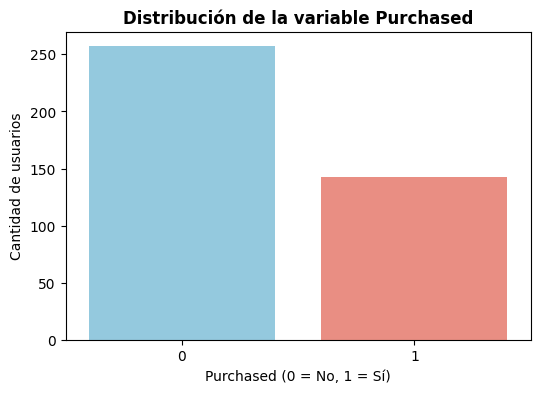

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribución de la variable Purchased', fontweight='bold')
plt.xlabel('Purchased (0 = No, 1 = Sí)', fontsize=10)
plt.ylabel('Cantidad de usuarios', fontsize=10)
plt.show()

No, las variable no estan baleanceadas, exixte un sesgo hacia la clase mayoritaria:
El modelo puede aprender a predecir siempre la clase dominante (ejemplo: "No compró") para maximizar la precisión (accuracy), ignorando la clase minoritaria.

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

Age y EstimatedSalary son relevantes porque:

Capturan factores socioeconómicos y demográficos vinculados al comportamiento de compra.

Son variables numéricas interpretables y procesables por modelos

Su combinación permite identificar segmentos de usuarios con alta propensión a comprar (ejemplo: profesionales con salarios altos).

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


La estratificación es esencial en problemas de clasificación con desbalance, ya que:

Mantiene la integridad estadística de los datos.

Permite una evaluación justa del modelo.

Previene sesgos durante el entrenamiento.

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.76      0.81      0.78        36

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



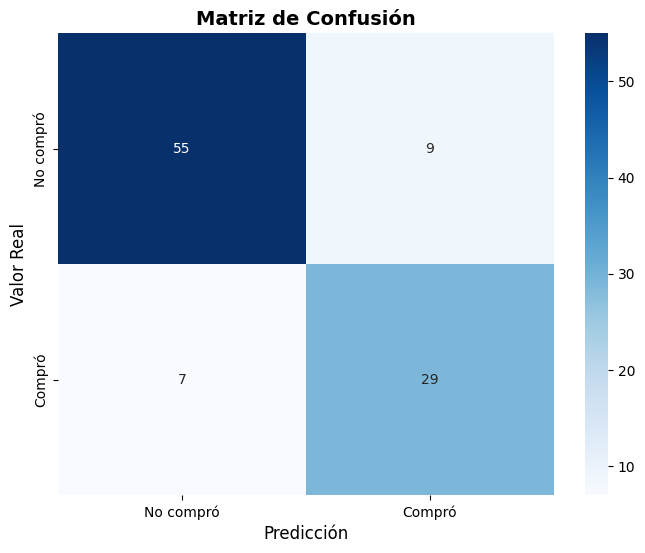

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No compró', 'Compró'],
            yticklabels=['No compró', 'Compró'])
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.show()


Falsos Positivos (FP)

Qué son: Usuarios que no compraron, pero el modelo predijo que sí.

Implicación:

Costo económico: Si el modelo se usa para campañas publicitarias, esto derivaría en gastos innecesarios (ejemplo: enviar descuentos a quienes no los usarán).

Falsos Negativos (FN)

Qué son: Usuarios que sí compraron, pero el modelo predijo que no.

Implicación:

Pérdida de oportunidades: No se atiende a clientes potencialmente valiosos.

Tasa de Error por Clase

Para la clase 0 (No compró): Errores = FP / (FP + TN).

Para la clase 1 (Compró): Errores = FN / (FN + TP).

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100



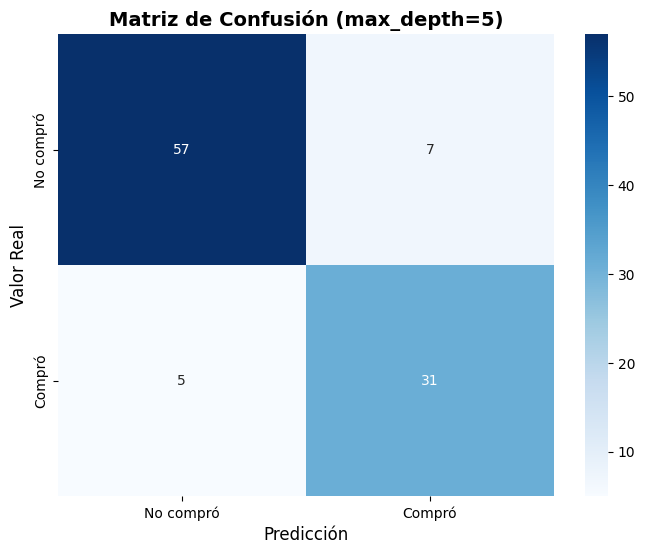

In [ ]:
classifier_depth5 = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
classifier_depth5.fit(X_train, y_train)
y_pred_depth5 = classifier_depth5.predict(X_test)

print(classification_report(y_test, y_pred_depth5))

cm_depth5 = confusion_matrix(y_test, y_pred_depth5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_depth5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No compró', 'Compró'],
            yticklabels=['No compró', 'Compró'])
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión (max_depth=5)', fontsize=14, fontweight='bold')
plt.show()


In [ ]:

print("Métricas del modelo inicial:")
print(classification_report(y_test, y_pred))

print("\nMétricas del modelo con max_depth=5:")
print(classification_report(y_test, y_pred_depth5))

print("\nMatriz de confusión del modelo inicial:")
print(cm)
print("\nMatriz de confusión del modelo con max_depth=5:")
cm_depth5


Métricas del modelo inicial:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.76      0.81      0.78        36

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100


Métricas del modelo con max_depth=5:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100


Matriz de confusión del modelo inicial:
[[55  9]
 [ 7 29]]

Matriz de confusión del modelo con max_depth=5:


array([[57,  7],
       [ 5, 31]])

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.